In [2]:
from PIL import Image

In [57]:
pieces = Image.open('pieces.png')

In [34]:
im2 = Image.open('test.png')

In [45]:
pieces = pieces.resize((384, 128))

In [43]:
pieces.getbbox()

(7, 6, 369, 123)

In [10]:
box = (0,0,64,64)

In [58]:
region = pieces.crop(box)

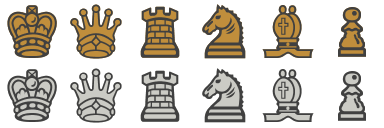

In [59]:
display(pieces)

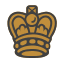

In [60]:
display(region)

In [4]:
board = Image.new('RGBA', (64*8, 64*8),'black')    #Black color
whiteSquare = Image.new('RGB', (64, 64), 'white')  #White color
for r in range(8):
    for c in range(8):
        if (r+c)%2 == 0:
            board.paste(whiteSquare, (r*64, c*64, (r+1)*64, (c+1)*64))

In [16]:
def createBoard(bColor, wColor):
    board = Image.new('RGBA', (64*8, 64*8), bColor)
    whiteSquare = Image.new('RGB', (64, 64), wColor)
    for r in range(8):
        for c in range(8):
            if (r+c)%2 == 0:
                board.paste(whiteSquare, (r*64, c*64, (r+1)*64, (c+1)*64))
    return board

In [75]:
def createImageDict(piecesImage):
    pieces = Image.open(piecesImage)
    toRet = {}
    
    toRet['K'] = pieces.crop((0, 64, 64, 128))
    toRet['Q'] = pieces.crop((64, 64, 128, 128))
    toRet['R'] = pieces.crop((128, 64, 192, 128))
    toRet['N'] = pieces.crop((192, 64, 256, 128))
    toRet['B'] = pieces.crop((256, 64, 320, 128))
    toRet['P'] = pieces.crop((320, 64, 384, 128))
    
    toRet['k'] = pieces.crop((0, 0, 64, 64))
    toRet['q'] = pieces.crop((64, 0, 128, 64))
    toRet['r'] = pieces.crop((128, 0, 192, 64))
    toRet['n'] = pieces.crop((192, 0, 256, 64))
    toRet['b'] = pieces.crop((256, 0, 320, 64))
    toRet['p'] = pieces.crop((320, 0, 384, 64))
    
    return toRet    

In [86]:
boardImage = createBoard((181, 136, 99), (240, 217, 181))
dic = createImageDict('pieces.png')

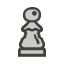

In [78]:
dic['P']

In [79]:
from Chess import Chess

In [80]:
chs = Chess()

In [87]:
board = chs.board

In [88]:
board

[['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', ''],
 ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
 ['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r']]

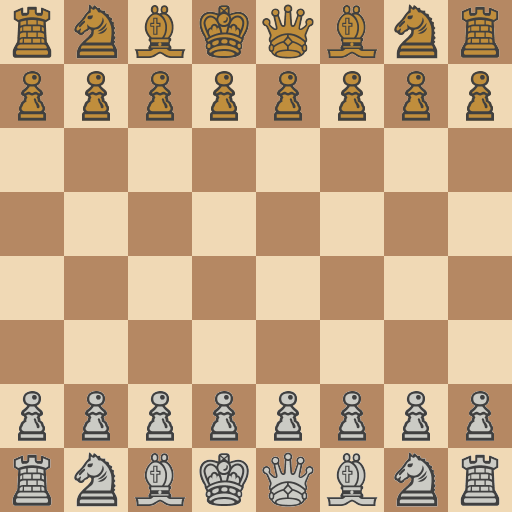

In [102]:
boardImage = createBoard((181, 136, 99), (240, 217, 181))
dic = createImageDict('pieces.png')
for r in range(len(board)):
    for c in range(len(board[r])):
        if board[r][c] is not '':
            boardImage.paste(dic[board[r][c]], ((7-c)*64, (7-r)*64), dic[board[r][c]])
boardImage